# Multiple Linear Regression Demo

## Step 1: Problem Formulation and Framing

We analyse the effect of various advertising media on the product sells.

Features
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

Output
- **Sales:** sales of a single product in a given market (in thousands of items)

Model
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [1]:
# import
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

## Step 2: Data Preparation and Exploration

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('../../data/advertising.xlsx', index_col=0)

In [3]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

In [4]:
# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [7]:
data.sample(5)

,TV,Radio,Newspaper,Sales
22,237.4,5.1,23.5,12.5
47,89.7,9.9,35.7,10.6
139,43.0,25.9,20.5,9.6
146,140.3,1.9,9.0,10.3
171,50.0,11.6,18.4,8.4


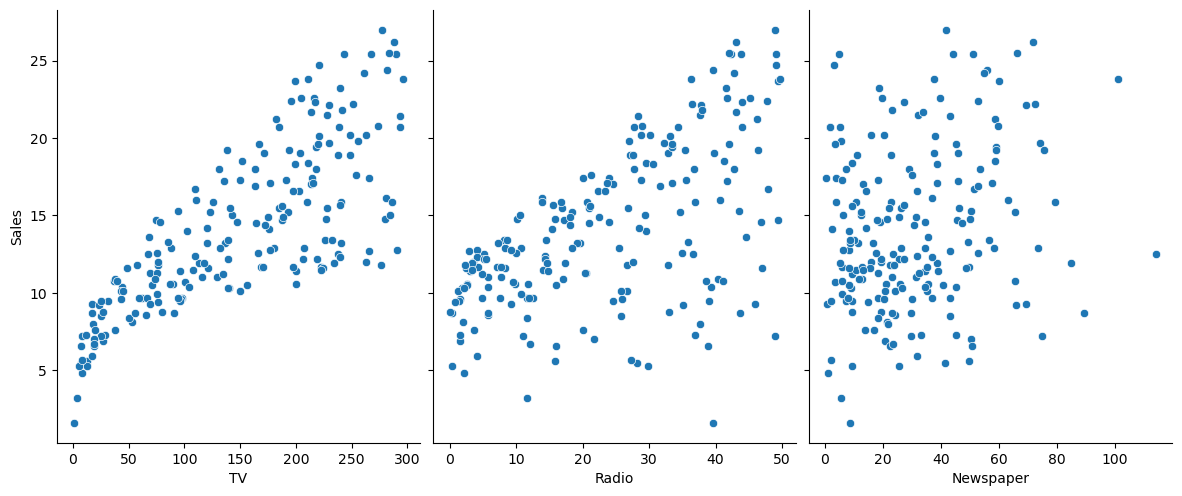

In [9]:
# visualise the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', height=5, aspect=0.8)

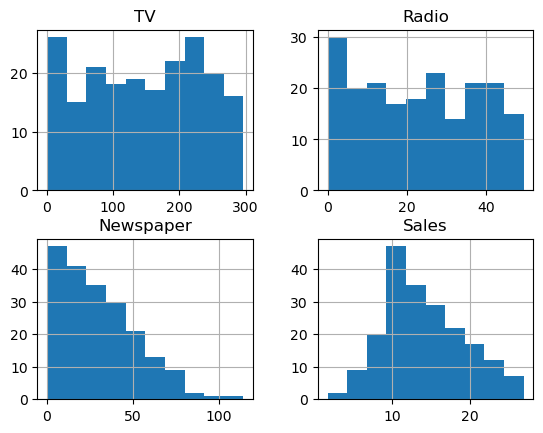

In [10]:
# histograms
hist = data.hist()

In [11]:
# to check null values in data
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Step 3: Train a Model

### Multiple Linear Regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

### Preparing X and y 

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [12]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [13]:
# select a Series from the DataFrame for y
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [14]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [15]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


### Splitting X and y into Training and Testing Sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

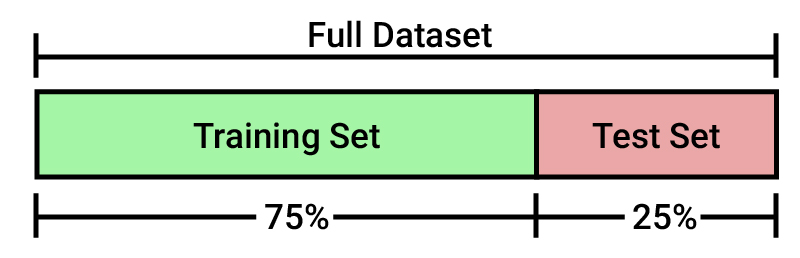

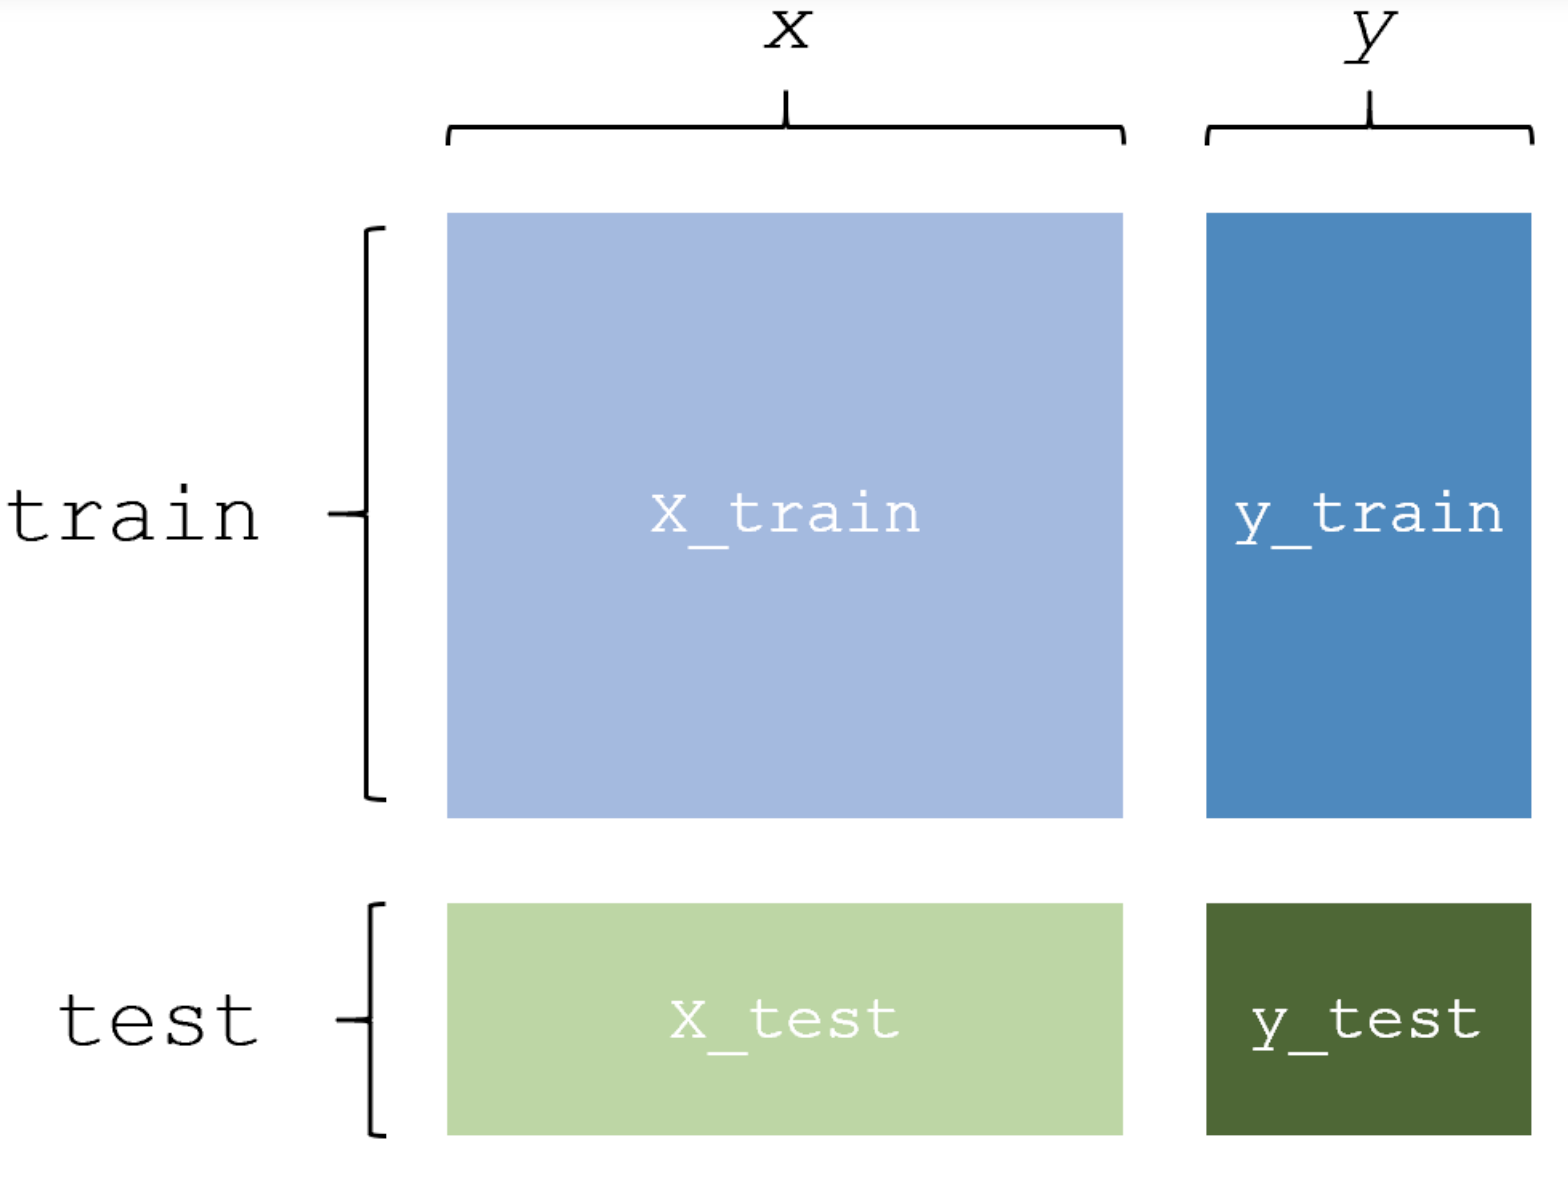

In [17]:
# default split 75:25
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [18]:
y_test.head()

59     23.8
41     16.6
35      9.5
103    14.8
185    17.6
Name: Sales, dtype: float64

In [20]:
X_test.head()

,TV,Radio,Newspaper
59,210.8,49.6,37.7
41,202.5,22.3,31.6
35,95.7,1.4,7.4
103,280.2,10.1,21.4
185,253.8,21.3,30.0


### Linear Regression by scikit-learn

In [21]:
# create a model
linreg = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)

LinearRegression()

### Interpret Model Coefficients

In [23]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

b0 = 2.8769666223179318
bi = [0.04656457 0.17915812 0.00345046]


In [24]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415026),
 ('Radio', 0.17915812245088852),
 ('Newspaper', 0.003450464711180405)]

The result of the model fitting shows how the sales depend on the advertising:
$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

Notes:
- This is a statement of **association**, not **causation**.
- If an increase in any ad spending was associated with a **decrease** in sales, $\beta_i$ would be **negative**.

## Step 4: Testing the Model

In [25]:
y_test.head()

59     23.8
41     16.6
35      9.5
103    14.8
185    17.6
Name: Sales, dtype: float64

In [26]:
# make predictions on the testing set
y_predicted = linreg.predict(X_test)

In [27]:
y_predicted

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

## Step 5: Model Evaluation Metrics

Instead, we need evaluation metrics designed for comparing continuous values.

The **three common evaluation metrics** for regression problems are:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [28]:
# calculate MAE using scikit-learn
from sklearn import metrics

In [29]:
print(metrics.mean_absolute_error(y_test, y_predicted))

1.0668917082595208


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [30]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_predicted))

1.9730456202283349


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [32]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1.4046514230328944


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### R-squared

In [33]:
# Explained variance (1 would be the best prediction)
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

Explained variance score  0.92


In [34]:
# R-squared
r2_score(y_test, y_predicted)

0.9156213613792233

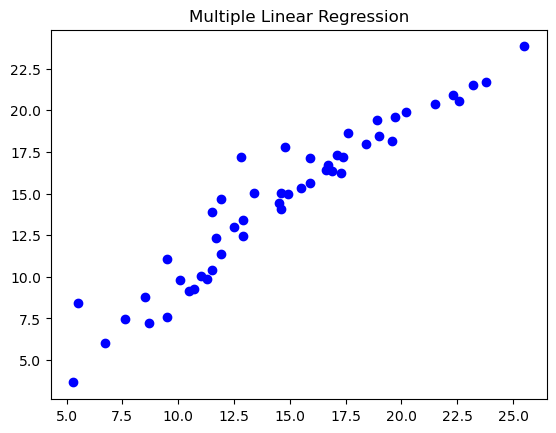

In [35]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

### Can We Improve the Model by Feature Selection?

**Newspaper** has very low coeficient, we can try to remove it and evaluate the new regression again.

In [36]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_predicted = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

1.3879034699382882


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.)

In [37]:
# R-squared
r2_score(y_test, y_predicted)

0.9176214942248908

We are aiming at bigger R-squared, close to 1.00, so improvement is valued.

## Exercise
Apply Multiple Regression Analysis to the house data.

## Resources

- [An Introduction to Statistical Learning](https://www.statlearning.com/) and [related videos](https://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) 
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm)
-  https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
